# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [452]:
import requests
import json
import time
import pandas as pd
import warnings; warnings.simplefilter('ignore')
import missingno as msno
%matplotlib inline

## Making requests to reddit

In [217]:
posts_food = []
posts_space = []
head = {'User-agent':'Medium Difficulty Zarya Bot'}
after_s = None
for i in range(42):
    print(i)
    if after_s == None:
        param_f = {}
        param_s = {}
    else:
        param_f = {'after':after_f}
        param_s = {'after':after_s}
    
    URL_food = "http://www.reddit.com/r/boardgames/new.json"
    URL_space ="http://www.reddit.com/r/space/new.json"
    
    res_food = requests.get(URL_food, params = param_f, headers = head)
    res_space = requests.get(URL_space, params = param_s, headers = head)
    if res_food.status_code == 200 & res_space.status_code == 200:
        json_food = res_food.json()
        json_space = res_space.json()
        posts_food.extend(json_food['data']['children'])
        posts_space.extend(json_space['data']['children'])
        
        after_f = json_food['data']['after'] 
        after_s = json_space['data']['after']
    else:
        print('Error in food: ',res_food.status_code,'\n','Error in space: ', res_space.status_code)
        break
    time.sleep(3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


### Making dataframe from request

In [218]:
df = pd.DataFrame(posts_food)

posts_food_2 = [i['data'] for i in posts_food]

df = pd.DataFrame(posts_food_2)

print('food post length: ',len(posts_food),'\n','space post length: ',len(posts_space))

food post length:  1050 
 space post length:  1028


### Checking how many unique posts there are

In [219]:
print(len(set([i['data']['name'] for i in posts_food])))

print(len(set([i['data']['name'] for i in posts_space])))

posts_food_df=pd.DataFrame([i['data'] for i in posts_food])
posts_space_df=pd.DataFrame([i['data'] for i in posts_space])

925
903


In [220]:
posts_food_df.head()

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,None,None,False,RandisHolmes,NaN,None,None,[],None,None,...,NaN,NaN,Looking for fellow board game players in Kansa...,2,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
1,None,None,False,mrepiq,NaN,None,None,[],None,None,...,NaN,NaN,"Watch us play through Summoner's Isle, an area...",4,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
2,None,None,False,taolmo,NaN,None,None,[],None,None,...,NaN,NaN,Bttlestar galactica express?,0,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
3,None,None,False,EliotShae,NaN,None,None,[],None,None,...,NaN,NaN,Best resources for board game development?,1,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
4,None,None,False,Spader623,NaN,None,None,[],None,None,...,NaN,NaN,I'm having a lot of trouble teaching games,11,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6


In [221]:
posts_space_df.head()

,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,None,None,False,mysterimandds,None,None,[],None,None,None,...,140.0,140.0,Got married today my bride knows how much I lo...,1,https://i.redd.it/86ql0ss1gal11.jpg,[],None,False,all_ads,6
1,None,None,False,imjustoran,None,None,[],None,None,None,...,NaN,NaN,Money to be made in space?,0,https://www.reddit.com/r/space/comments/9egz1e...,[],None,False,all_ads,6
2,None,None,False,retrologian,None,None,[],None,None,None,...,140.0,140.0,Earth from Apollo 8,14,http://i.imgur.com/TGQA0vI.jpg,[],None,False,all_ads,6
3,None,None,False,GetJackHere,None,None,[],None,None,None,...,140.0,140.0,NASA images of Jupiter,51,https://i.redd.it/f9fqwoec6al11.jpg,[],None,False,all_ads,6
4,None,None,False,Silverseren,None,None,[],None,None,None,...,105.0,140.0,Dawn: Mission to Small Worlds,4,https://www.youtube.com/watch?v=JrafypeEhTM,[],None,False,all_ads,6


In [223]:
#Looking at the different columns of data we get from the request
posts_food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 96 columns):
approved_at_utc                  0 non-null object
approved_by                      0 non-null object
archived                         1050 non-null bool
author                           1050 non-null object
author_cakeday                   3 non-null object
author_flair_background_color    351 non-null object
author_flair_css_class           345 non-null object
author_flair_richtext            1044 non-null object
author_flair_template_id         194 non-null object
author_flair_text                345 non-null object
author_flair_text_color          351 non-null object
author_flair_type                1044 non-null object
author_fullname                  1044 non-null object
banned_at_utc                    0 non-null object
banned_by                        0 non-null object
can_gild                         1050 non-null bool
can_mod_post                     1050 non-null bool
c

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [224]:
# Export to csv
posts_food_df.to_csv('./food_posts.csv')
posts_space_df.to_csv('./space_posts.csv')

In [268]:
posts_combined = pd.concat([posts_food_df,posts_space_df])

/Users/madhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [270]:
#Making the subreddit column binary
posts_combined["subreddit"] = posts_combined["subreddit"].map({"boardgames" : 0, "space" : 1})
posts_combined.reset_index(drop=True,inplace=True)

In [449]:
posts_combined.to_csv('./posts_combined.csv')

In [440]:
features = ['title']
target = ['subreddit']
X = posts_combined[features]
y = posts_combined[target]

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

## Predicting comments using Random Forests + Another Classifier

In [442]:
## YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix

In [443]:
features = ['title'] 
target = ['subreddit']

In [444]:
cvtr = CountVectorizer(ngram_range=(1,3), stop_words=ENGLISH_STOP_WORDS, binary=True)

for i in features:

    counts_train = cvtr.fit_transform(X_train[i]) #,y_train[target])
    counts_test = cvtr.transform(X_test[i]) #, y_train[target])
    if i == features[0]:
        countcvtr_df = pd.DataFrame(counts_train.toarray(),columns = cvtr.get_feature_names())
        countcvts_df = pd.DataFrame(counts_test.toarray(),columns = cvtr.get_feature_names())
    else:
        pd.concat([countcvtr_df,pd.DataFrame(counts_train)])
        pd.concat([countcvts_df,pd.DataFrame(counts_test)])

countcvtr_df.to_csv('./cvtr.csv')
countcvts_df.to_csv('./cvts.csv')

In [434]:
countcvtr_df.sum().sort_values(ascending=False).head(20).to_csv("top_20.csv")

### Random Forest

In [460]:
rf = RandomForestClassifier(n_jobs=3)
params={
    'n_estimators':[60,65,70],
    'max_depth':[None,2,10,40,100]
}
rfgs = GridSearchCV(estimator=rf,param_grid=params,cv=10, verbose=0)
rfgs.fit(countcvtr_df[countcvtr_df.columns],y=y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 65, 70], 'max_depth': [None, 2, 10, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [461]:
best_rf = rfgs.best_estimator_
y_pred = best_rf.predict(countcvts_df)
cross_val_score(best_rf,countcvts_df,y_test,cv=10).mean()

0.909595463729759

In [462]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()

print("True Negatives: %s" % tn1)
print("False Positives: %s" % fp1)
print("False Negatives: %s" % fn1)
print("True Positives: %s" % tp1)

True Negatives: 257
False Positives: 6
False Negatives: 35
True Positives: 222


### GradientBoosting

In [463]:
gb = GradientBoostingClassifier()
gb.fit(countcvtr_df[countcvtr_df.columns],y=y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [464]:
y_pred = gb.predict(countcvts_df)
cross_val_score(gb,countcvts_df,y_test,cv=10).mean()

0.8535565895443809

In [465]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred).ravel()

print("True Negatives: %s" % tn2)
print("False Positives: %s" % fp2)
print("False Negatives: %s" % fn2)
print("True Positives: %s" % tp2)

True Negatives: 260
False Positives: 3
False Negatives: 61
True Positives: 196


In [466]:
confusion = pd.DataFrame({'True Negative': [tn1,tn2], 'False Positive': [fp1,fp2], 'False Negative': [fn1,fn2], 'True Positive': [tp1,tp2]})

In [470]:
confusion.to_csv('./confuse.csv')

In [432]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

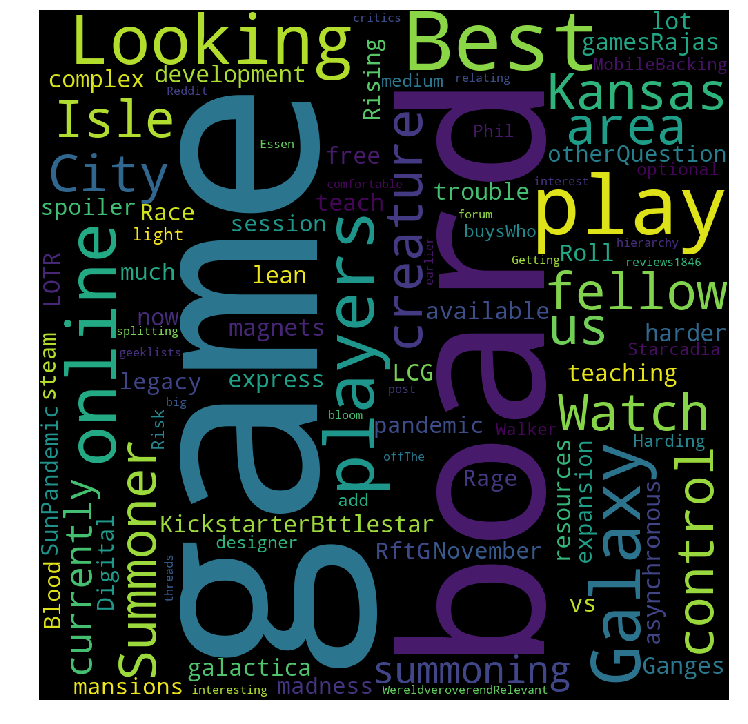

In [433]:
corpus_string = ''
for i in range(20):
    corpus_string = corpus_string + posts_combined.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

# Executive Summary
---
Put your executive summary in a Markdown cell below.

In this project I looked at 2 subreddits and tried to build a classification model using 2 different methods. I started out by requesting the json from the Reddit API and pulling the specific data for posts. Using loops and a sleep delay, I pulled about 950 unique posts, 25 at a time per request. Using this data I created a dataframe and then used the specific title column to train a CountVectorizer to create a tokenized form of my titles. I also converted my subreddit column to binary for use during the classification process.
After building out my CountVectorizer, I created a random forest and a Gradient boost model to classify, utilizing a gridsearch to find the best parameters of the ones I believed to be important and influential, n_estimates (how many trees,etc) and max depth (how many layers the trees should split,etc).
From the post analyisis it can be seen that the random forest performed better overall, with a 5% higher score and about 2x fewer misclassifications